In [33]:
import pandas as pd, matplotlib.pyplot as plt
import numpy as np

In [34]:
from sklearn.preprocessing import MinMaxScaler

from kmodes.kprototypes import KPrototypes

In [35]:
df = pd.read_csv('segmentation-data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [36]:
df['Education'].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [37]:
df.isnull().sum()
# No hay valores nulos

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [41]:
df_temp = df[['ID', 'Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [53]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [55]:
df.drop(['ID'],inplace=True,axis=1)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.500000,1,0.320595,0,0
1996,1,1,0.155172,1,0.299460,1,0
1997,0,0,0.224138,0,0.184871,0,0
1998,1,1,0.103448,1,0.227162,0,0


In [57]:
mark_array = df.values

mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)

In [58]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


# Building the model

In [107]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array,categorical=[0,1,3,5,6])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 744, ncost: 179.33994044906206
Run: 1, iteration: 2/20, moves: 186, ncost: 178.18399003081169
Run: 1, iteration: 3/20, moves: 41, ncost: 178.1013129706028
Run: 1, iteration: 4/20, moves: 11, ncost: 178.0957946974701
Run: 1, iteration: 5/20, moves: 5, ncost: 178.09433368626424
Run: 1, iteration: 6/20, moves: 0, ncost: 178.09433368626424
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 708, ncost: 163.95747131370123
Run: 2, iteration: 2/20, moves: 294, ncost: 162.92379769371448
Run: 2, iteration: 3/20, moves: 44, ncost: 162.8340781634074
Run: 2, iteration: 4/20, moves: 12, ncost: 162.8167867306247
Run: 2, iteration: 5/20, moves: 8, ncost: 162.80853433758543
Run: 2, iteration: 6/20, moves: 1, ncost: 162.80747662544636
Run: 2, iteration: 7/20, moves: 0, ncost: 162.80747662544636
Init: initializing centroids
Init: init

In [63]:
print(kproto.cluster_centroids_)

[[0.41181267 0.37024815 0.         0.         1.         1.
  1.        ]
 [0.20010813 0.18415315 1.         1.         1.         0.
  0.        ]
 [0.18851024 0.29205215 1.         1.         1.         1.
  0.        ]
 [0.59582709 0.5441883  0.         0.         2.         2.
  2.        ]
 [0.14503043 0.16373447 0.         0.         0.         0.
  0.        ]
 [0.18454972 0.36528029 0.         0.         0.         1.
  2.        ]
 [0.65222323 0.38291036 1.         1.         2.         1.
  1.        ]
 [0.43058076 0.22368848 0.         0.         1.         0.
  0.        ]
 [0.16783955 0.32123587 1.         1.         1.         1.
  1.        ]
 [0.1778715  0.33073105 1.         1.         1.         1.
  2.        ]]


In [69]:
print(len(kproto.cluster_centroids_))
clusters

10


array([3, 9, 7, ..., 4, 1, 4], dtype=uint16)

In [70]:
cluster_col = []

for c in clusters:
    cluster_col.append(c)
    
df['cluster'] = cluster_col

# poniendo las columnas originales de temp a df
df[['ID','Age','Income']] = df_temp

In [93]:
df[df['cluster']==0]['Income'].mean()

86203.78048780488

In [94]:
df[df['cluster']==1]['Income'].mean()

137106.7162162162

In [95]:
df[df['cluster']==2]['Income'].mean()

115717.609375

In [96]:
df[df['cluster']==0]['Age'].mean()

41.88513513513514

In [97]:
df[df['cluster']==1]['Age'].mean()

29.606271777003485

In [105]:
df[df['cluster']==3]['Age'].mean()

52.55797101449275

# Scatter plot de los segmentos

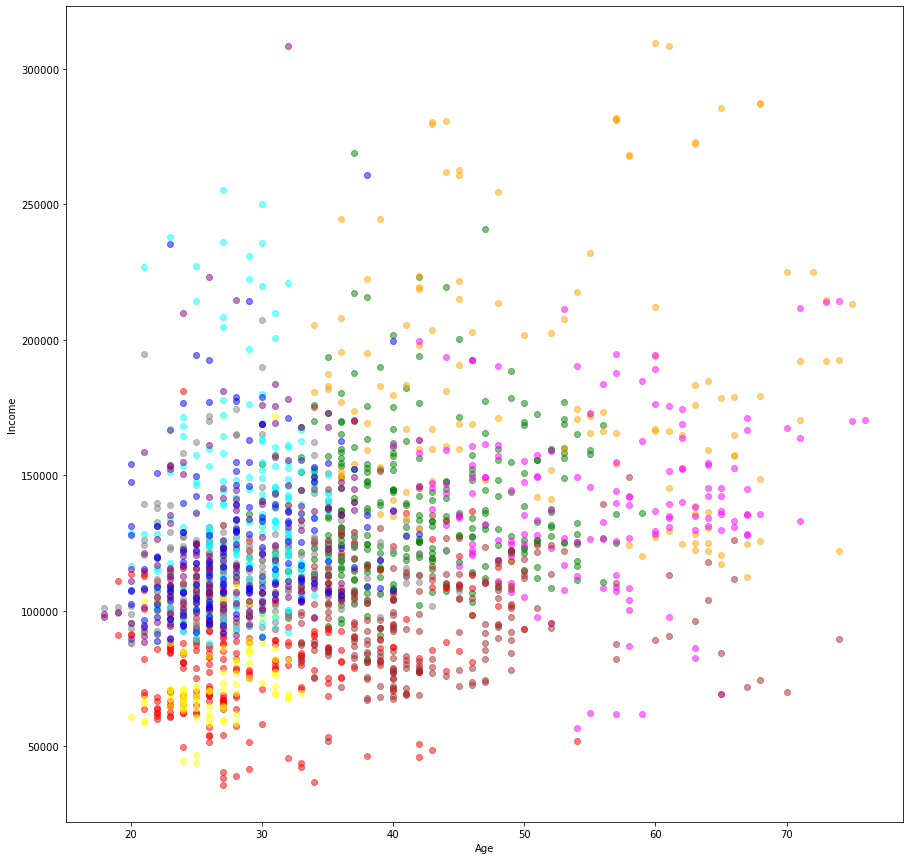

In [104]:
colors = ['green','red','gray','orange','yellow','cyan','magenta','brown','purple','blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10),colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age,dftemp['Income'],color=col, alpha=0.5)